# Проект по обработке и визуализации данных

### Цель проекта:

**Цель проекта - выполнить шаги по мотивам статьи  [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)* о рейтингах фильмов и посмотреть, сможем ли мы прийти к тем же выводам, которые приведены в статье. Необходимо определить, предоставляла ли компания Fandango завышенные рейтинги в 2015 году для того, чтобы продавать больше билетов.**

## Часть 1: Исследуем данные

----

### Данные

Исходные данные для статьи [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) находятся в свободном доступе по следующей ссылке на github: https://github.com/fivethirtyeight/data. Это два csv-файла. В одном файле данные о рейтингах от компании Fandango, а в другом файле агрегированные данные о рейтингах от других компаний, таких как Metacritic, IMDB и Rotten Tomatoes.

#### all_sites_scores.csv

-----

Файл `all_sites_scores.csv` содержит все фильмы, для которых есть рейтинг Rotten Tomatoes, рейтинг RT User, оценка Metacritic, оценка Metacritic User и оценка IMDb, а также как минимум 30 отзывов от фанатов на Fandango. Данные Fandango были выгружены 24 августа 2015.

Колонка | Определение
--- | -----------
FILM | Название фильма
RottenTomatoes | Оценка "Rotten Tomatoes Tomatometer" для этого фильма
RottenTomatoes_User | Оценка "Rotten Tomatoes user" для этого фильма
Metacritic | Оценка "Metacritic" для этого фильма
Metacritic_User | Оценка "Metacritic user" для этого фильма
IMDB | Оценка "IMDb user" для этого фильма
Metacritic_user_vote_count | Количество голосов за этот фильм от пользователей Metacritic
IMDB_user_vote_count | Количество голосов за этот фильм от пользователей IMDb

----
----

#### fandango_scape.csv

Фильм `fandango_scrape.csv` содержит данные о фильмах, которые авторы статьи выгрузили с Fandango.

Колонка | Определение
--- | ---------
FILM | Название фильма
STARS | Количество звёзд на Fandango.com
RATING |  Рейтинг Fandango - значение, прочитанное с HTML-страницы. Это средний рейтинг фильма.
VOTES | Количество голосов пользователей, которые написали отзыв о фильме (на момент выгрузки данных).

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Часть 2: Сравниваем рейтинги Fandango и другие пользовательские рейтинги

Изучим рейтинги Fandango и посмотрим, совпадут ли результаты нашего анализа с выводами в статье.

In [46]:
fandango = pd.read_csv("fandango_scrape.csv")

In [47]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [48]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [49]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


Изучим связь между популярностью фильма и его рейтингом.

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

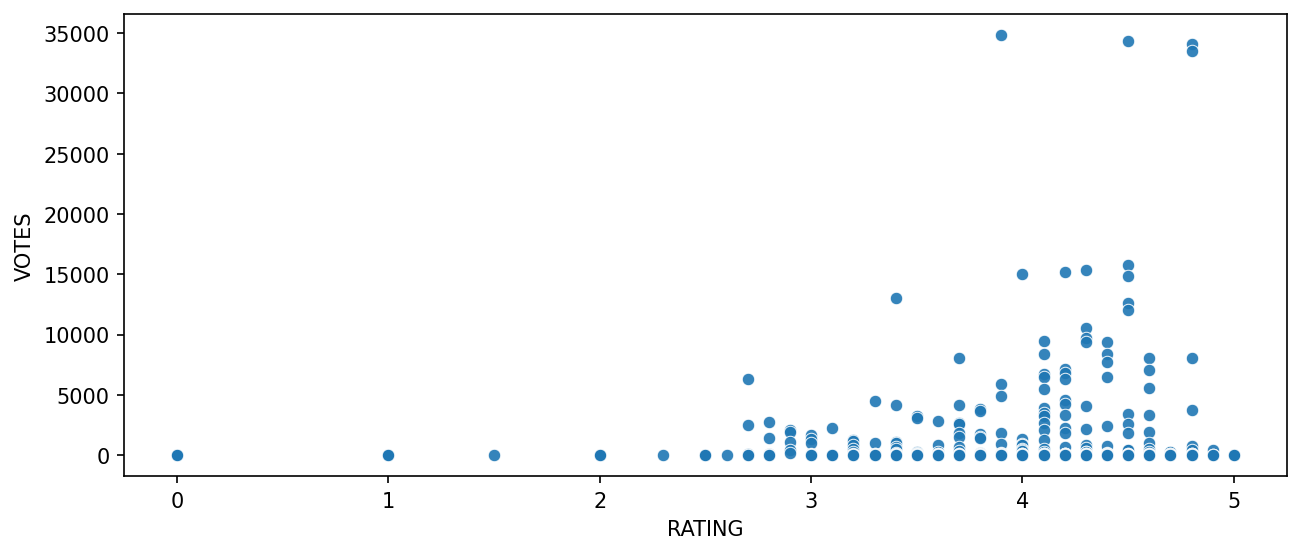

In [50]:
plt.figure(figsize=(10, 4), dpi=150)
sns.scatterplot(x='RATING', y='VOTES', data=fandango, alpha=0.9)



**Корреляция между колонками:**

In [51]:
corr = fandango.corr()
corr

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [52]:

fandango['YEAR'] = fandango['FILM'].str[-5:-1]
fandango['YEAR']

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
499    2015
500    2015
501    2015
502    1964
503    2012
Name: YEAR, Length: 504, dtype: object

In [53]:
# Количество фильмов в разбивке по годам
fandango['YEAR'].value_counts()

2015    478
2014     23
1964      1
2012      1
2016      1
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

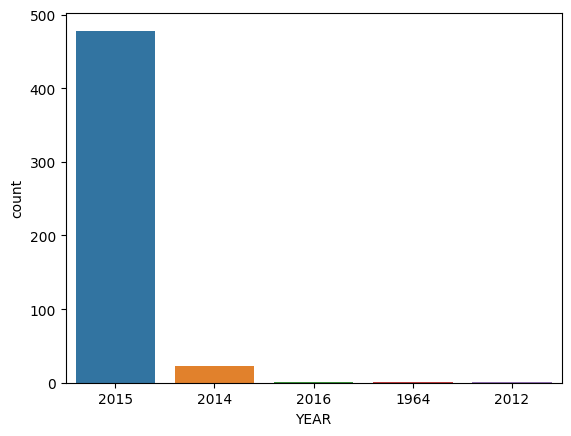

In [54]:
sns.countplot(x='YEAR', data=fandango)

In [55]:
# Топ 10 фильмов по количеству отзывов
fandango.sort_values('VOTES', ascending=False).iloc[:10]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [56]:
# Количество фильмов с нулевым количеством голосов
len(fandango[fandango['VOTES'] == 0])

69

In [57]:
# Датафрейм, в котором только фильмы с отзывами
fandango_with_votes = fandango[fandango['VOTES'] > 0].copy()
fandango_with_votes.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


----

**Из-за особенностей отображения рейтингов в виде звёзд на страницах HTML, истинные рейтинги пользователей могут немного отличаться от рейтингов, которые показываются пользователю. Визуализируем эту разницу распределений.**

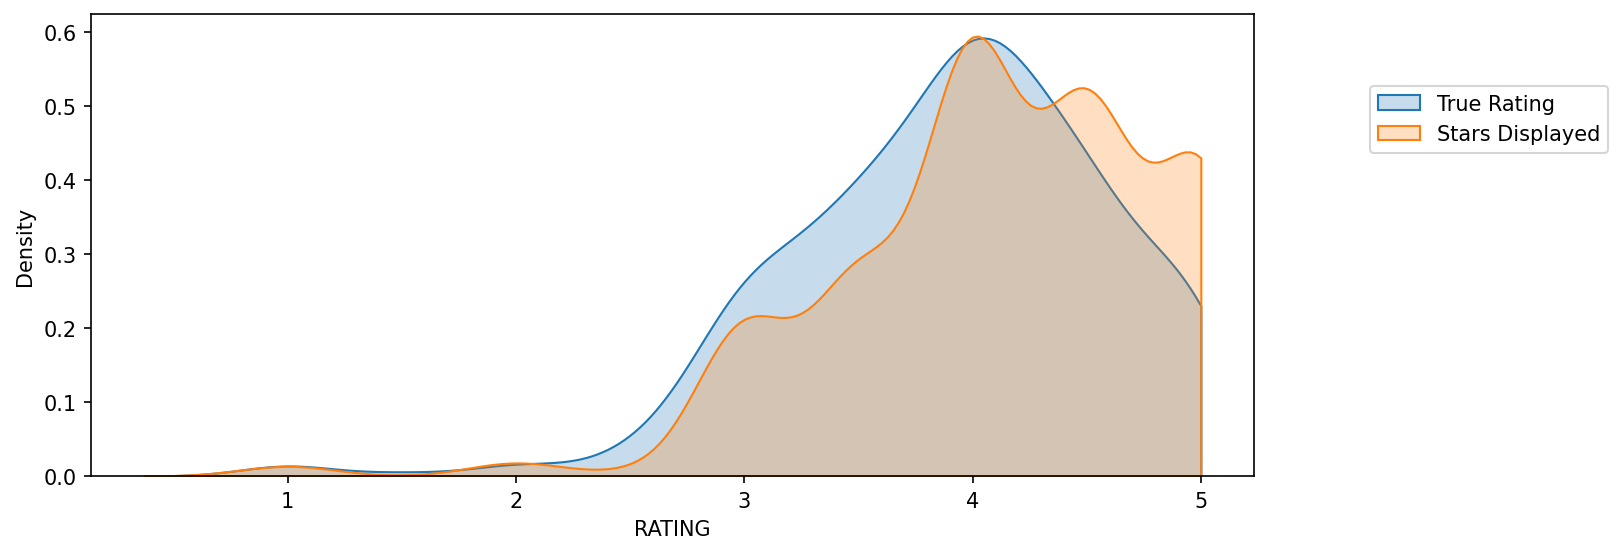

In [58]:
plt.figure(figsize=(10, 4), dpi=150)
sns.kdeplot(x='RATING', data=fandango_with_votes, clip=(0, 5), fill=True, label='True Rating') 
sns.kdeplot(x='STARS', data=fandango_with_votes, clip=(0, 5), fill=True, label='Stars Displayed')
plt.legend(loc=(1.1, 0.7))

**Посчитаем эту разницу в численном виде**

In [59]:
fandango_with_votes['STARS_DIFF'] = np.round(fandango_with_votes['STARS'] - fandango_with_votes['RATING'], 1)
fandango_with_votes

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**Сколько раз встречается то или иное значение разницы между STAR и RATING:**

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

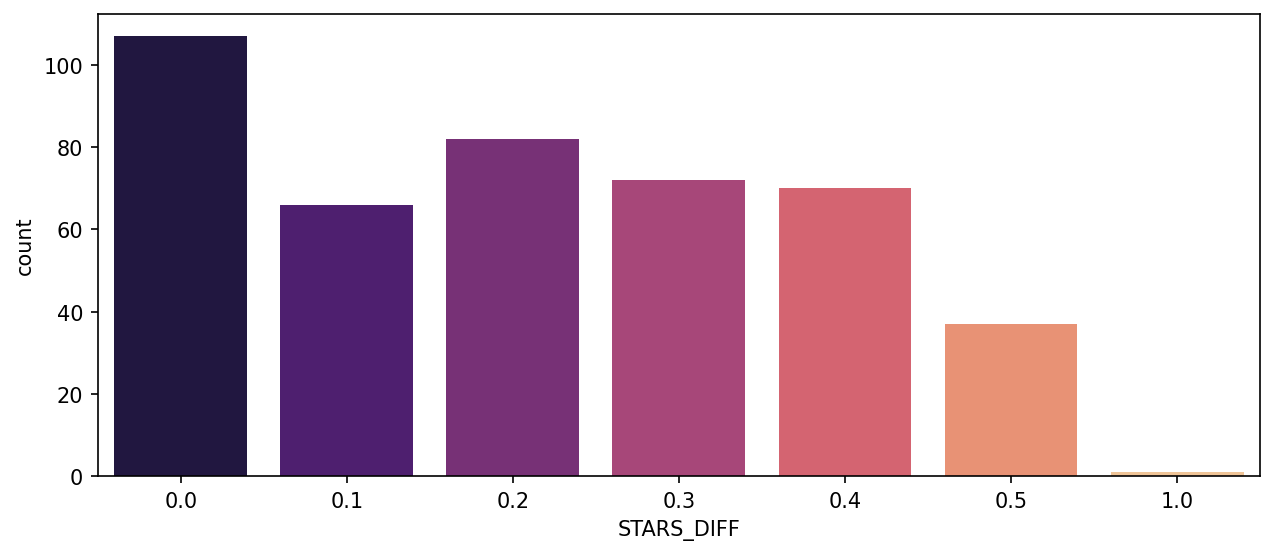

In [60]:
plt.figure(figsize=(10, 4), dpi=150)
sns.countplot(data=fandango_with_votes, x='STARS_DIFF', palette='magma')

In [61]:
# Фильм с разницей в 1 звезду между отображаемым и истинным рейтингом
fandango_with_votes[fandango_with_votes['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Часть 3: Сравнение рейтингов Fandango с рейтингами других компаний

Посмотрим, как рейтинги Fandango соотносятся с рейтингами других компаний.

In [62]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [63]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [64]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [65]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Рейтинги от Rotten Tomatoes

<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

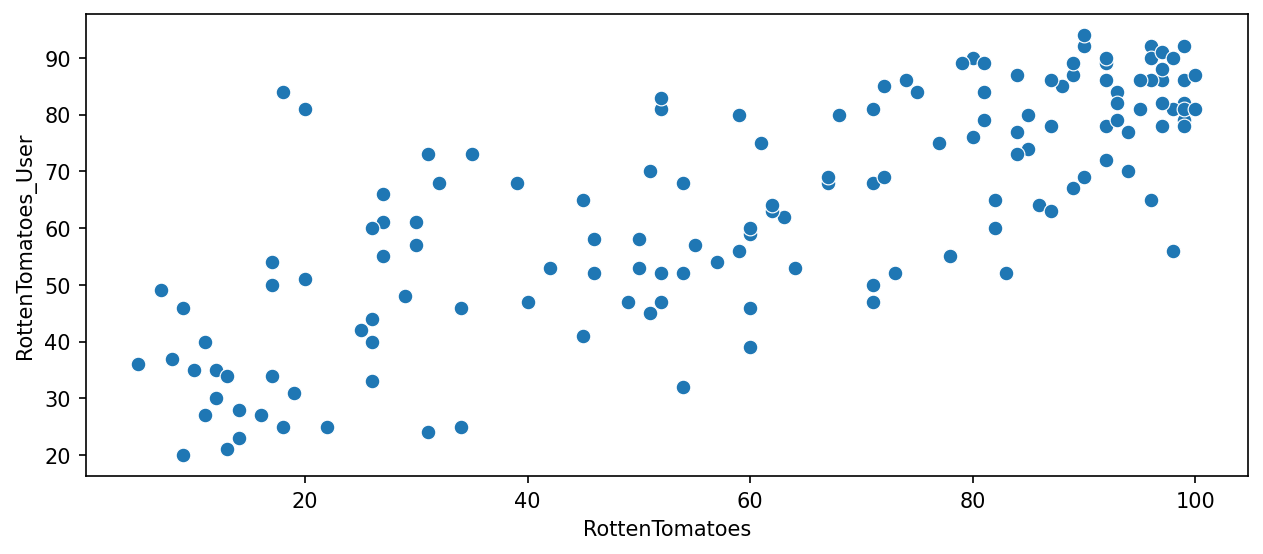

In [66]:
# График scatterplot, изображающий для Rotten Tomatoes связь между рейтингами от критиков и пользовательскими рейтингами.
plt.figure(figsize=(10, 4), dpi=150)
sns.scatterplot(x='RottenTomatoes', y='RottenTomatoes_User', data=all_sites, s=50)

Изучим численную разницу между этими двумя рейтингами. Мы посчитаем эту разницу с помощью формулы RottenTomatoes-RottenTomatoes_User. Полученные значения Rotten_Diff - это рейтинг критиков минус рейтинг пользователей. Близкие к нулю значения говорят о том, что критики и пользователи согласны друг с другом. Большие положительные значения - когда критики оценили фильм намного выше, чем пользователи. А большие отрицательные значения - наоборот, пользователи оценили фильм намного выше, чем критики.


In [67]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

Теперь давайте посчитаем среднее значение полученной разницы по всему набору данных. Поскольку разница может быть как положительной, так и отрицательной, то давайте сначала возьмём абсолютные величины всех значений, и только после этого посчитаем среднее значение. Таким образом мы получим среднее значение абсолютной разницы между рейтингами от критиков и пользовательскими рейтингами.

In [68]:
np.abs(all_sites['Rotten_Diff']).mean()

15.095890410958905

<AxesSubplot:title={'center':'RT Critics Score minus RT User Score'}, xlabel='Rotten_Diff', ylabel='Count'>

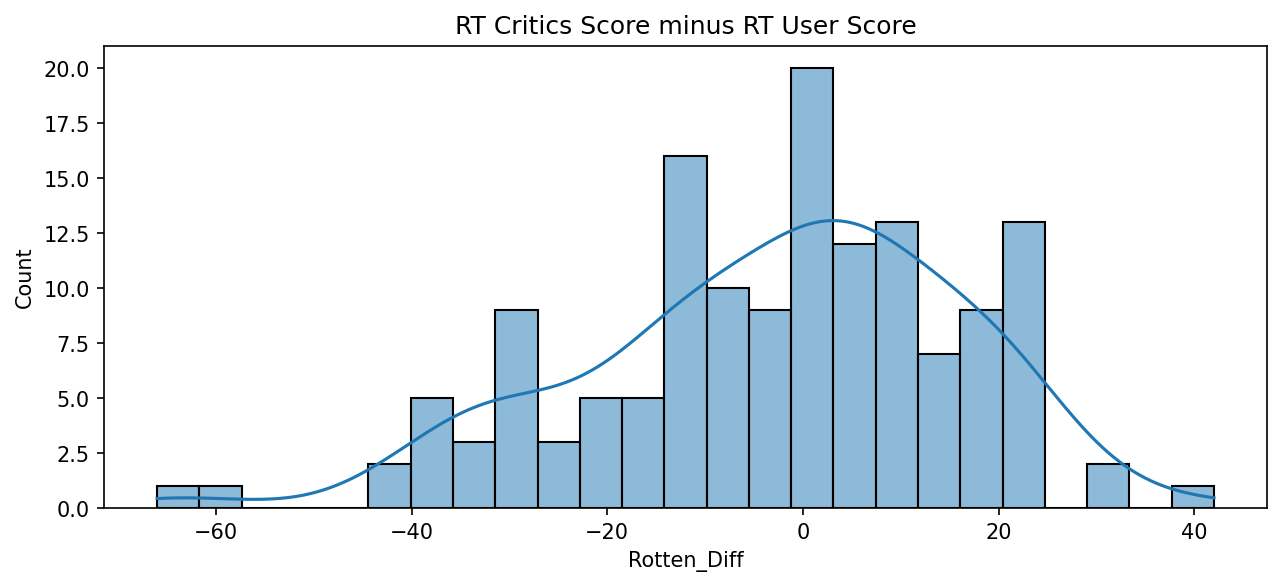

In [69]:
# График распределения разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes
plt.figure(figsize=(10, 4), dpi=150)
plt.title('RT Critics Score minus RT User Score')
sns.histplot(data=all_sites, x='Rotten_Diff', kde=True, bins=25)

<AxesSubplot:title={'center':'Abs Difference between RT Critics Score and RT User Score'}, xlabel='Rotten_Diff', ylabel='Count'>

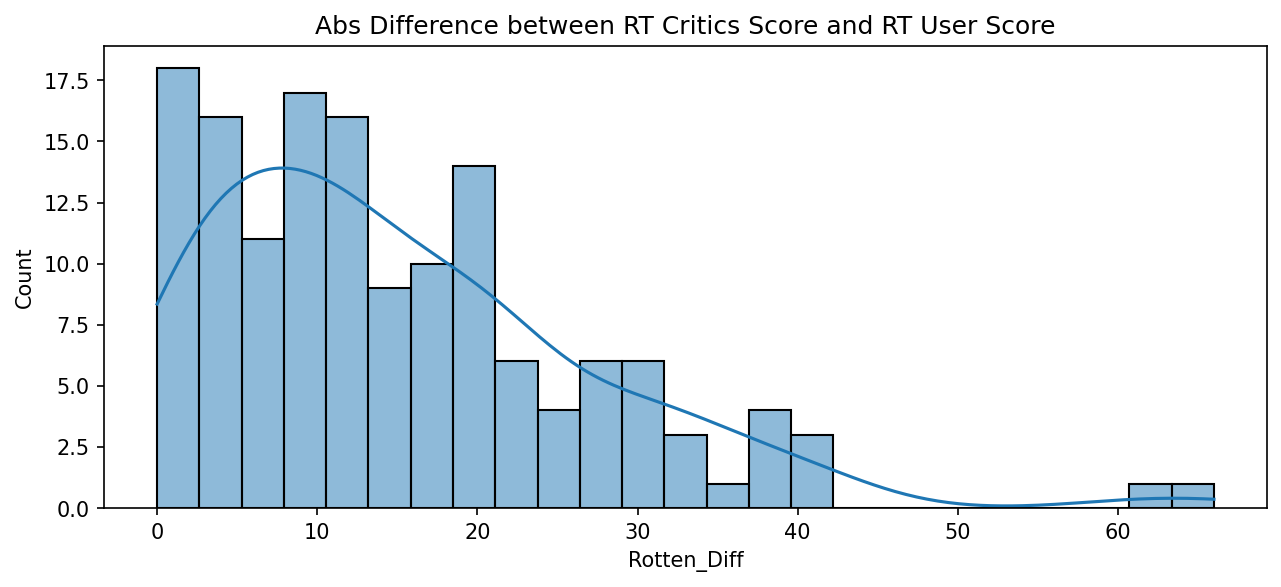

In [70]:
# График распределения абсолютных значений разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes.
plt.figure(figsize=(10, 4), dpi=150)
plt.title('Abs Difference between RT Critics Score and RT User Score')
sns.histplot(x=np.abs(all_sites['Rotten_Diff']), kde=True, bins=25)


In [71]:
# 5 фильмов, которые в среднем были выше всего оценены пользователями, по сравнению с оценками от критиков
all_sites.nsmallest(5, columns='Rotten_Diff')[['FILM', 'Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [72]:
# 5 фильмов, которые в среднем были выше всего оценены критиками, по сравнению с оценками от пользователей
all_sites.nlargest(5, columns='Rotten_Diff')[['FILM', 'Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## Рейтинги от MetaCritic

<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User'>

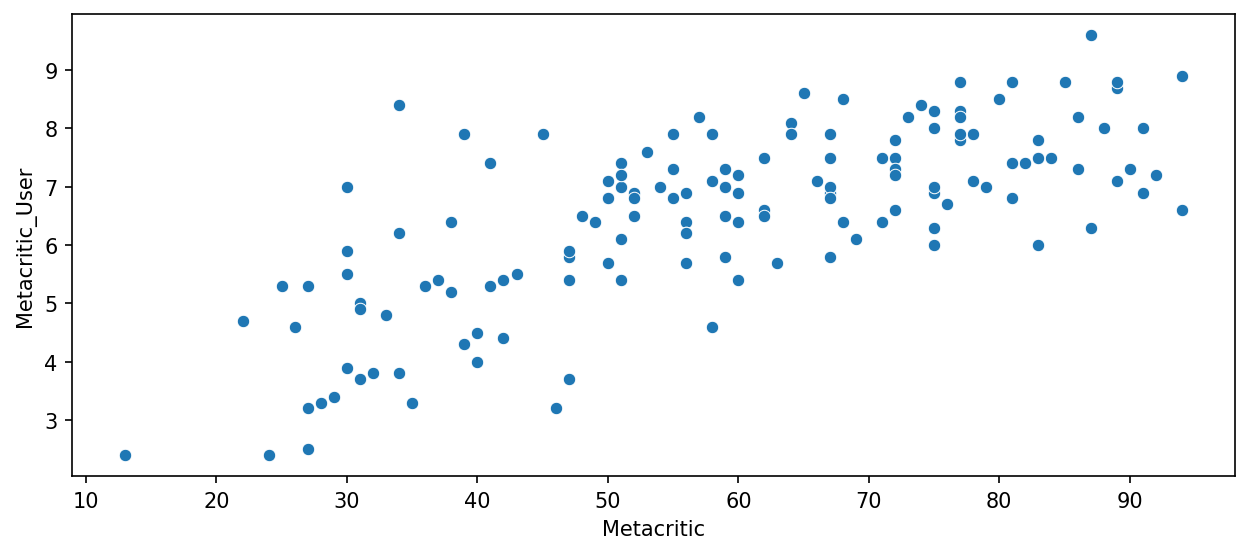

In [73]:
# График scatterplot для сравнения рейтингов Metacritic и Metacritic User
plt.figure(figsize=(10, 4), dpi=150)
sns.scatterplot(x='Metacritic', y='Metacritic_User', data=all_sites)

## Рейтинги от IMDB


<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

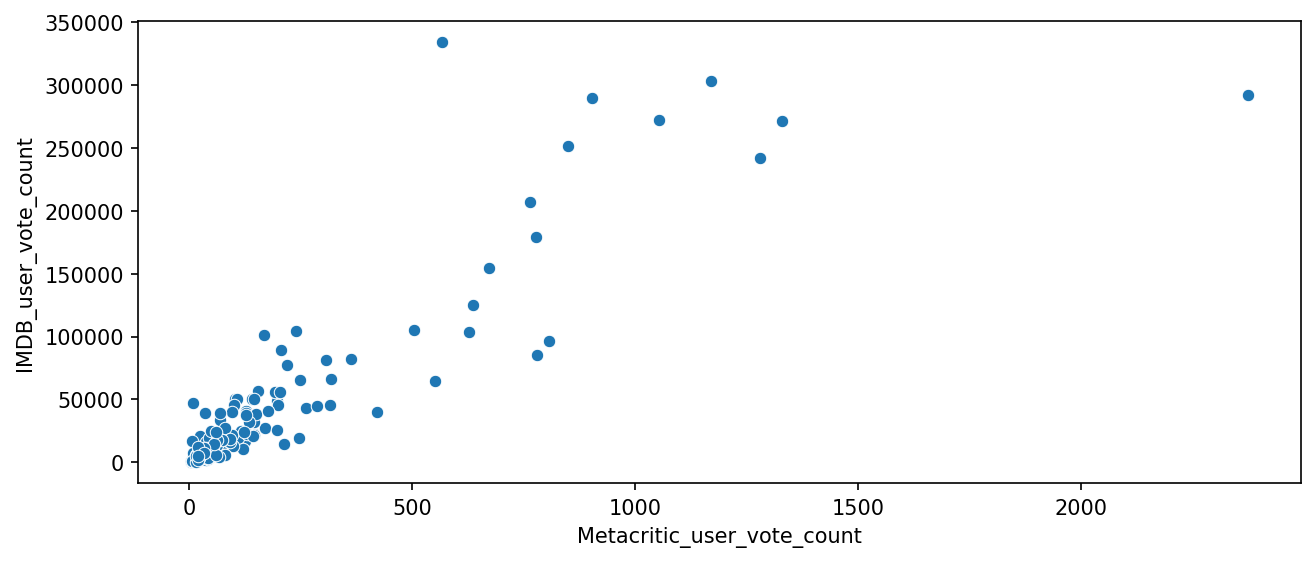

In [74]:
# График scatterplot для изображения связи между количеством голосов на MetaCritic и количеством голосов на IMDB
plt.figure(figsize=(10, 4), dpi=150)
sns.scatterplot(x='Metacritic_user_vote_count', y='IMDB_user_vote_count', data=all_sites)

**Здесь мы видим выбросы. Один фильм получил наибольшее количество голосов на IMDB, но только 500 голосов на Metacritic.**


In [75]:
# Фильм, который получил наибольшее количество голосов на IMDB
all_sites.nlargest(1, 'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [76]:
# Фильм, который получил наибольшее количество голосов на Metacritic
all_sites.nlargest(1, 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Сравнение рейтингов Fandango с рейтингами других компаний


**ЗАДАНИЕ: Объедините таблицу fandango с таблицей all_sites. Не каждый фильм в таблице Fandango найдётся в таблице all_sites, потому что некоторые фильмы Fandango имеют очень мало отзывов или вообще не имеют отзывов. Но мы хотим сравнивать только те фильмы, которые есть в обеих таблицах. Поэтому сделайте объединение "*inner* merge" двух наборов данных, сопоставляя строки по колонке FILM.**

In [77]:
# Фильмы, которые есть в таблице fandango и в таблице all_sites
df = pd.merge(fandango, all_sites, how='inner', on='FILM')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [78]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


### Нормализация колонок до диапазона 0-5 в соответствии с колонками STARS и RATINGS от Fandango

Компании Rotten Tomatoes, Metacritic и IMDB используют другую шкалу измерения рейтингов, чем шкала от 0 до 5 звезд в Fandango. Чтобы выполнить сравнения, нам нужно *нормализовать* эти значения, чтобы они попадали с диапазон от 0 до 5 звёзд.

In [90]:
df['RT_Norm'] = np.round(df['RottenTomatoes'] / 20, 1)
df['RT_User_Norm'] = np.round(df['RottenTomatoes_User'] / 20, 1)
df['Meta_Norm'] = np.round(df['Metacritic'] / 20, 1)
df['Meta_User_Norm'] = np.round(df['Metacritic_User'] / 2, 1)
df['IMDB_Norm'] = np.round(df['IMDB'] / 2, 1)
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RT_User_Norm,Meta_Norm,Meta_User_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [149]:
norm_scores = df[['FILM', 'STARS', 'RATING', 'RT_Norm',	'RT_User_Norm',	'Meta_Norm', 'Meta_User_Norm',	'IMDB_Norm']].copy()
norm_scores.set_index('FILM', inplace=True)
norm_scores.head()



,STARS,RATING,RT_Norm,RT_User_Norm,Meta_Norm,Meta_User_Norm,IMDB_Norm
FILM,,,,,,,
Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1
Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,3.6
American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7
Furious 7 (2015),5.0,4.8,4.0,4.2,3.4,3.4,3.7
Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Сравнение распределений рейтингов от разных компаний


А теперь момент истины! Действильно ли Fandango показывал неоправданно высокие рейтинги? Мы уже знаем, что отображаемые значения RATING были выше значений STARS. Но являются ли сами рейтинги в среднем более высокими, чем у других компаний?


**ЗАДАНИЕ: Нарисуйте график, сравнивающий распределения нормализованных рейтингов от всех компаний. Это можно сделать разными способами, но попробуйте использовать Seaborn KDEplot (посмотрите документацию). Не беспокойтесь, если Ваш график будет выглядеть немного иначе нашего примера. Главное, чтобы были видны отличия между отдельными распределениями.**

p.s. если Вам нужно переместить легенду на графике seaborn kdeplot, то это можно сделать вот так: https://github.com/mwaskom/seaborn/issues/2280

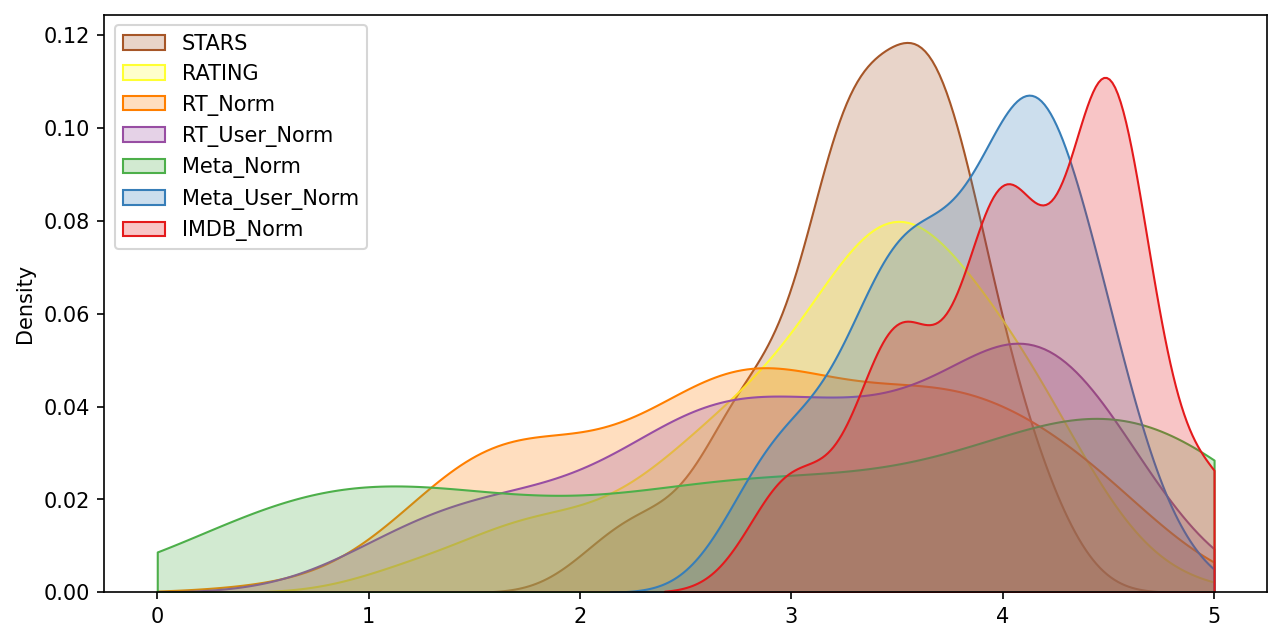

In [150]:
plt.figure(figsize=(10, 5), dpi=150)

sns.kdeplot(data=norm_scores, fill=True, clip=(0, 5), palette='Set1')

plt.legend(loc="upper left", labels=norm_scores.columns)


**Рейтинги Fandango очень сдвинуты справо. Интересно также, что рейтинги RT от критиков имеют очень пологое распределение. Сравним только эти два распределения.** 


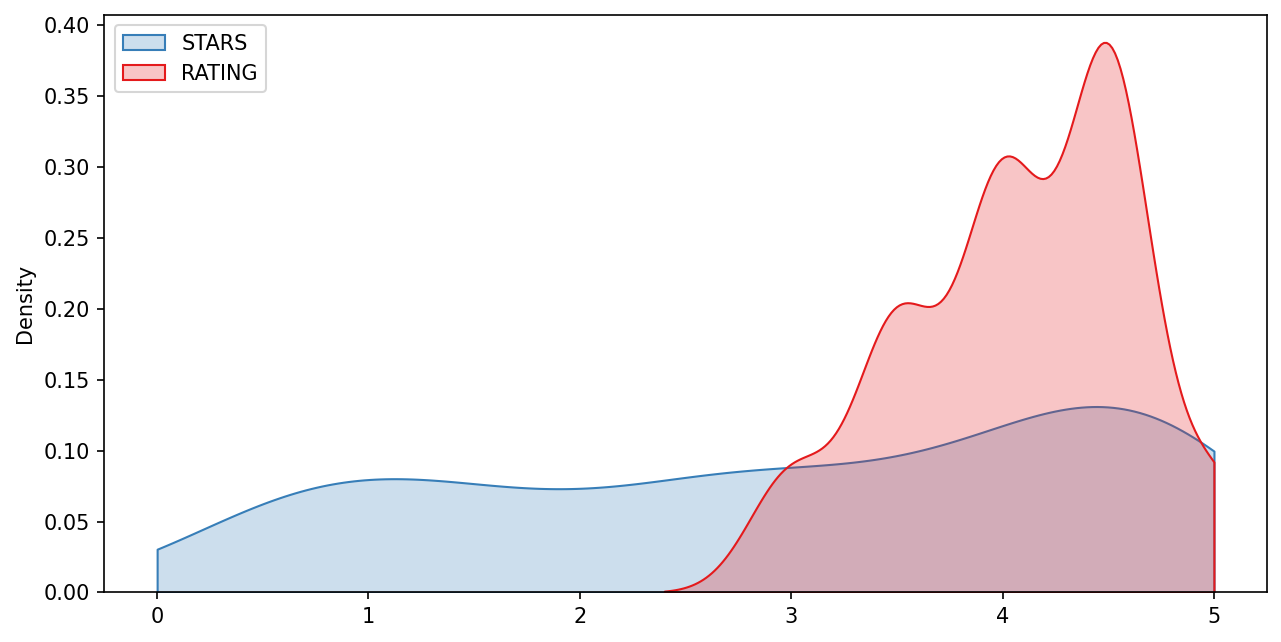

In [151]:
plt.figure(figsize=(10, 5), dpi=150)

sns.kdeplot(data=norm_scores[['STARS','RT_Norm']], fill=True, clip=(0, 5), palette='Set1')

plt.legend(loc="upper left", labels=norm_scores.columns)


<AxesSubplot:ylabel='Count'>

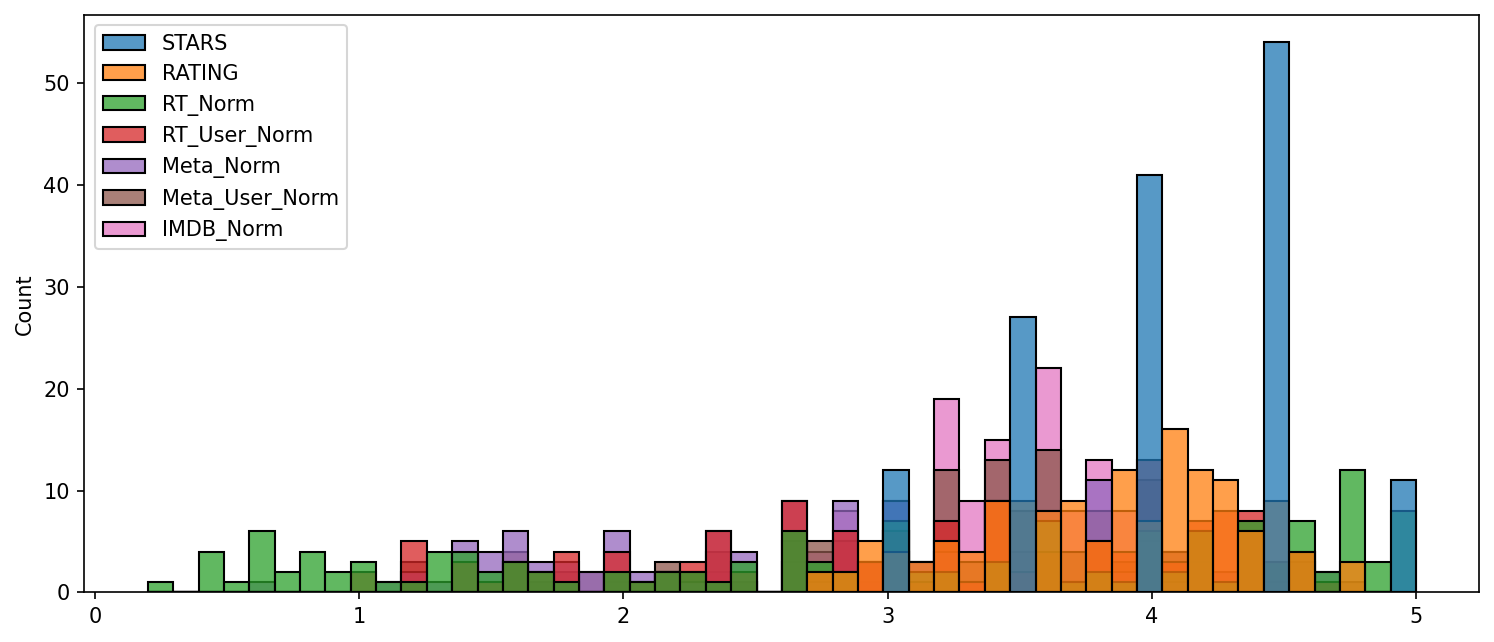

In [152]:
# Гистограмма, сравнивающая все нормализованные рейтинги
plt.figure(figsize=(12, 5), dpi=150)
sns.histplot(data=norm_scores, bins=50)



### Как различные компании оценивают фильмы с наименьшими рейтингами?


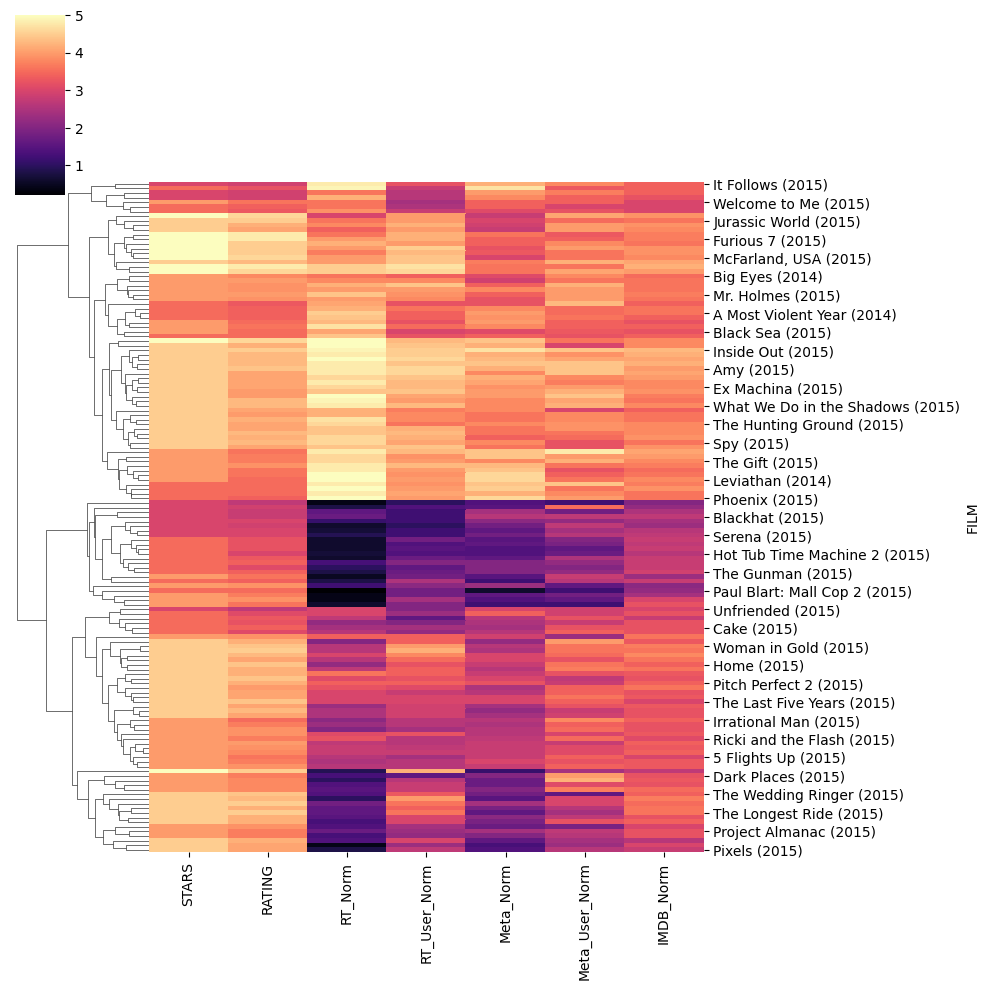

In [157]:
# Clustermap для всех нормализованных рейтинго 
# Фильмы с высокими рейтингами должны попадать в одни кластеры, а фильмы с низкими рейтингами в другие кластеры
sns.clustermap(data=norm_scores, cmap='magma', col_cluster=False)

**ЗАДАНИЕ: Мы видели, что рейтинги Fandango явно выше рейтингов других компаний, особенно если смотреть на округлённые вверх значения рейтингов. Давайте посмотрим на 10 фильмов с наихудшими рейтингами по версии Rotten Tomatoes Critic - какие это 10 фильмов? Какие нормализованные рейтинги дали этим фильмам другие компании? Возможно Вам понадобится колонка FILM, так что если вы удаляли её, то верните эту колонку обратно.**

In [158]:
# 10 фильмов с наихудшими рейтингами по версии Rotten Tomatoes Critic
norm_scores.nsmallest(10, columns='RT_Norm')

,STARS,RATING,RT_Norm,RT_User_Norm,Meta_Norm,Meta_User_Norm,IMDB_Norm
FILM,,,,,,,
Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8


<AxesSubplot:title={'center':"Ratings for RT Critic's 10 Worst Reviewed Films"}, ylabel='Density'>

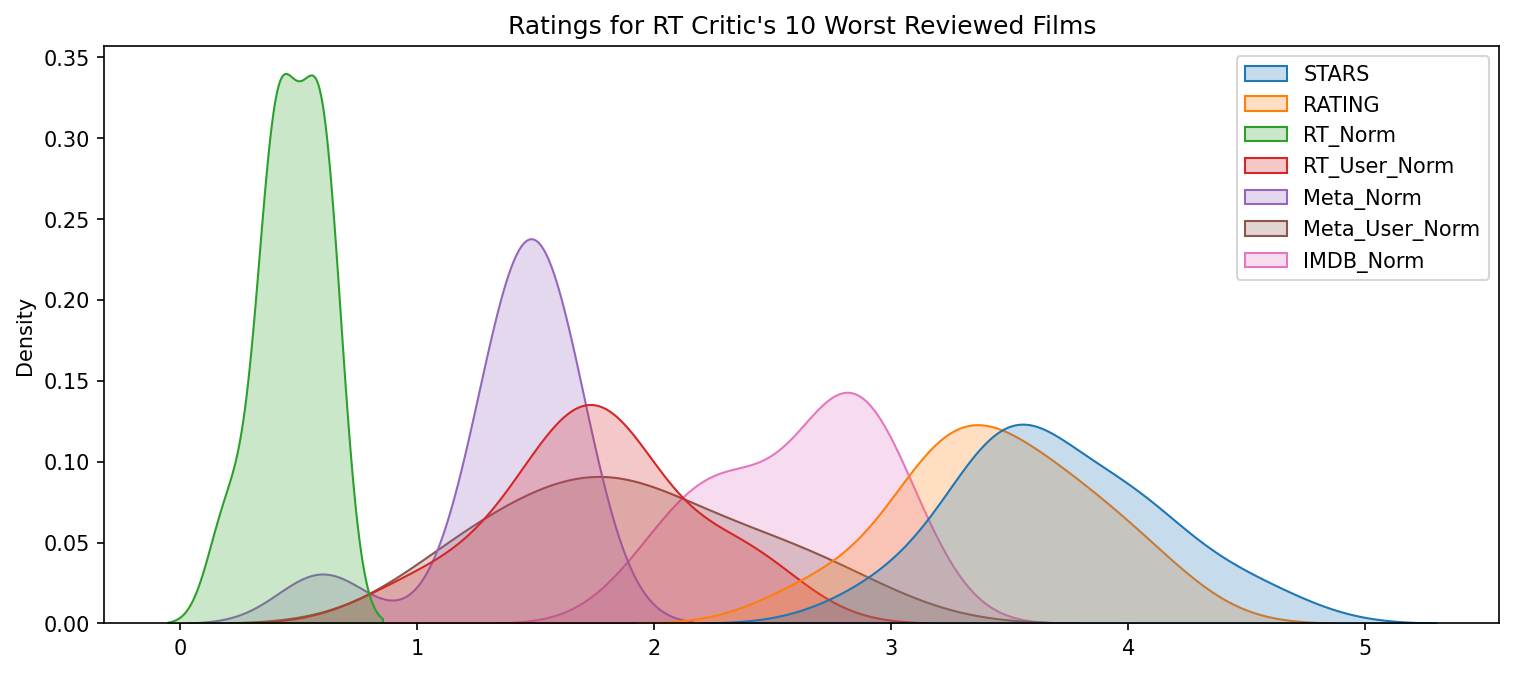

In [162]:
# Распределение рейтингов от всех компаний для 10 фильмов с наихудшими рейтингами
plt.figure(figsize=(12, 5), dpi=150)
plt.title('Ratings for RT Critic\'s 10 Worst Reviewed Films')
sns.kdeplot(data=norm_scores.nsmallest(10, columns='RT_Norm'),fill=True)



**Выводы: Fandango показывал 3-4 звезды для фильмов, которые явно были неудачными**  
    
**Больше всего отличается фильм [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0) - Fandango дал ему рейтинг 4.5 звёзд, хотя этот фильм получил [средний рейтинг 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) от других компаний.**

In [164]:
norm_scores.iloc[25]

STARS             4.5
RATING            4.1
RT_Norm           0.4
RT_User_Norm      2.3
Meta_Norm         1.3
Meta_User_Norm    2.3
IMDB_Norm         3.0
Name: Taken 3 (2015), dtype: float64

In [165]:
0.4+2.3+1.3+2.3+3

9.3

In [166]:
9.3/5

1.86

----